In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Bank_fraud.csv')

In [3]:
data

step       customer  age gender zipcodeOri       merchant zipMerchant  \
0          0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1          0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2          0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3          0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4          0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
...      ...            ...  ...    ...        ...            ...         ...   
594638   179  'C1753498738'  '3'    'F'    '28007'  'M1823072687'     '28007'   
594639   179   'C650108285'  '4'    'F'    '28007'  'M1823072687'     '28007'   
594640   179   'C123623130'  '2'    'F'    '28007'   'M349281107'     '28007'   
594641   179  'C1499363341'  '5'    'M'    '28007'  'M1823072687'     '28007'   
594642   179   'C616528518'  '4'    'F'    '28007'  'M1823072687'     '28007'   

                   category  amount  fraud  
0       'es_transportation'    4.55      0  
1       'es_transportation'   39.68      0  
2       'es_transportation'   26.89      0  
3       'es_transportation'   17.25      0  
4       'es_transportation'   35.72      0  
...                     ...     ...    ...  
594638  'es_transportation'   20.53      0  
594639  'es_transportation'   50.73      0  
594640         'es_fashion'   22.44      0  
594641  'es_transportation'   14.46      0  
594642  'es_transportation'   26.93      0  

[594643 rows x 10 columns]

In [4]:
data.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [5]:
data.shape

(594643, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
data.fraud.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

C:\Users\assim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


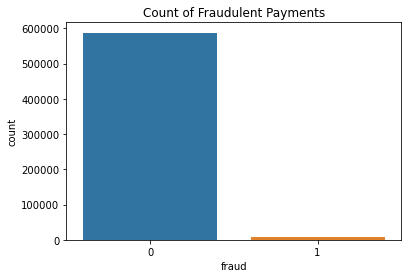

In [8]:
sns.countplot(data.fraud)

plt.title("Count of Fraudulent Payments")
plt.show()

No handles with labels found to put in legend.


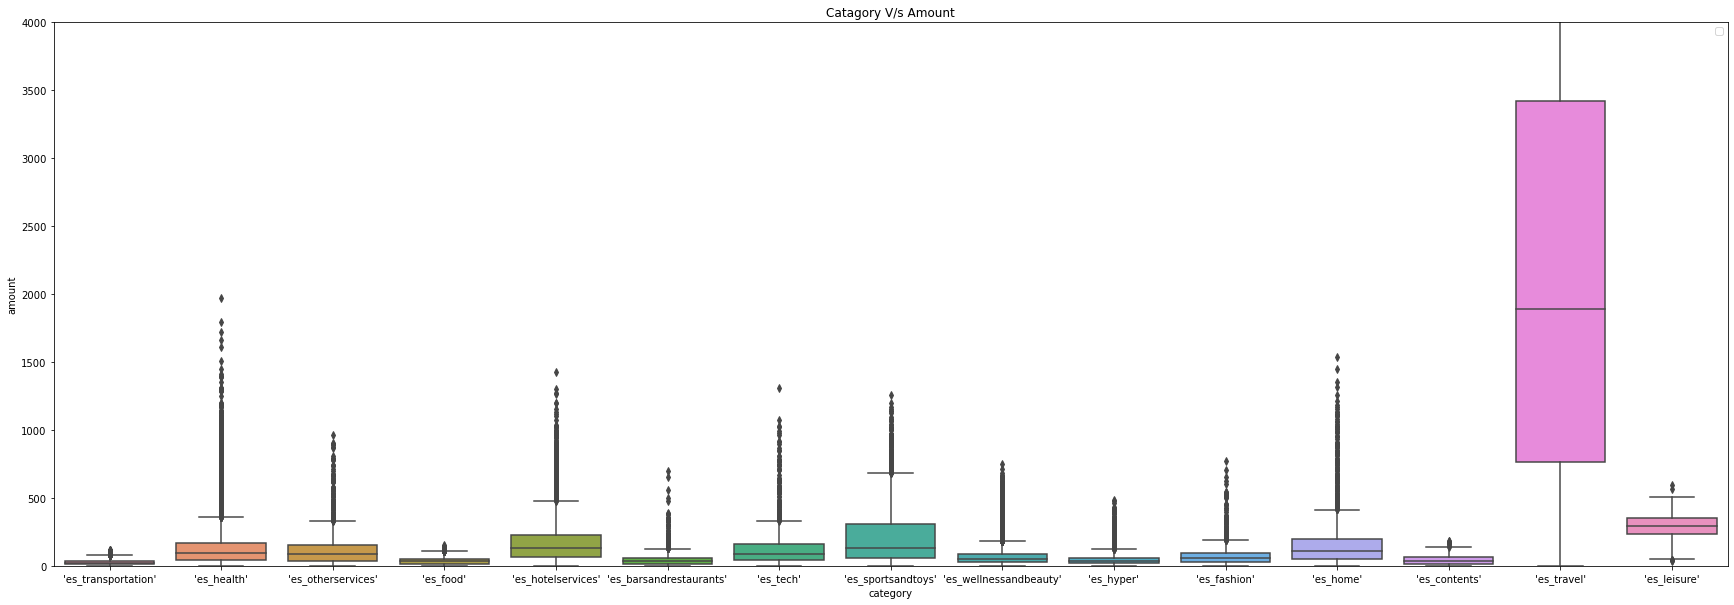

In [9]:
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title('Catagory V/s Amount')
plt.ylim(0,4000)
plt.legend()
plt.show()

In [10]:
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud':'Fraud Percentage'}).sort_values(by='Fraud Percentage'))

   Age  Fraud Percentage
7  'U'          0.594228
6  '6'          0.974826
5  '5'          1.095112
1  '1'          1.185254
3  '3'          1.192815
2  '2'          1.251401
4  '4'          1.293281
0  '0'          1.957586


In [11]:
print(data.zipMerchant.nunique())
print(data.zipcodeOri.nunique())

1
1


In [12]:
data=data.drop(['zipMerchant','zipcodeOri'],axis=1)

In [13]:
data.head()

step       customer  age gender       merchant             category  \
0     0  'C1093826151'  '4'    'M'   'M348934600'  'es_transportation'   
1     0   'C352968107'  '2'    'M'   'M348934600'  'es_transportation'   
2     0  'C2054744914'  '4'    'F'  'M1823072687'  'es_transportation'   
3     0  'C1760612790'  '3'    'M'   'M348934600'  'es_transportation'   
4     0   'C757503768'  '5'    'M'   'M348934600'  'es_transportation'   

   amount  fraud  
0    4.55      0  
1   39.68      0  
2   26.89      0  
3   17.25      0  
4   35.72      0

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['customer']= le.fit_transform(data['customer'])
data['gender']= le.fit_transform(data['gender'])
data['merchant']= le.fit_transform(data['merchant'])
data['category']= le.fit_transform(data['category'])
data['age']= le.fit_transform(data['age'])

In [15]:
data.head()

step  customer  age  gender  merchant  category  amount  fraud
0     0       210    4       2        30        12    4.55      0
1     0      2753    2       2        30        12   39.68      0
2     0      2285    4       1        18        12   26.89      0
3     0      1650    3       2        30        12   17.25      0
4     0      3585    5       2        30        12   35.72      0

In [16]:
x = data.drop('fraud',axis=1)
y = data['fraud']

In [22]:
y.value_counts()


0    587443
1      7200
Name: fraud, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
y_res = pd.DataFrame(y_res)
print(y_res[1:].value_counts())

fraud
1        587443
0        587442
dtype: int64


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3, random_state=42, shuffle =True ,stratify=y_res)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [55]:
def plot_roc_auc(y_test, preds):
    
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [59]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    176233
           1       0.98      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of K-Nearest Neigbours: 
 [[171999   4234]
 [   362 175871]]


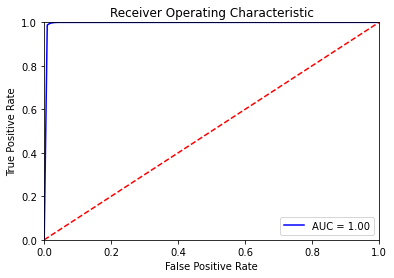

In [60]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, knn.predict_proba(x_test)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    176233
           1       0.97      0.99      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466

Confusion Matrix of Random Forest Classifier: 
 [[170106   6127]
 [  1079 175154]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


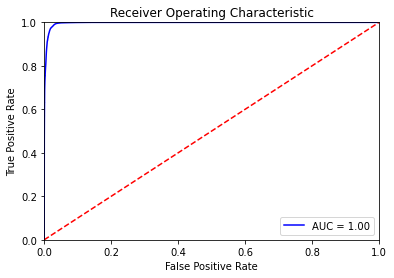

In [62]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, rf_clf.predict_proba(x_test)[:,1])

[13:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    176233
           1       0.99      1.00      0.99    176233

    accuracy                           0.99    352466
   macro avg       0.99      0.99      0.99    352466
weighted avg       0.99      0.99      0.99    352466

Confusion Matrix of XGBoost: 
 [[174047   2186]
 [   706 175527]]


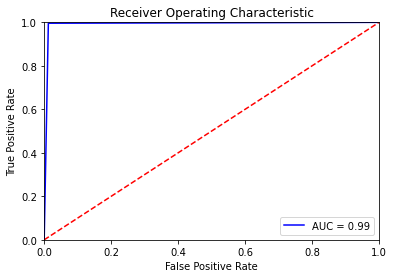

In [68]:
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                scale_pos_weight=1, base_score=0.5, random_state=42,verbosity=1)
,
XGBoost_CLF.fit(x_train,y_train)

y_pred = XGBoost_CLF.predict(x_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, XGBoost_CLF.predict_proba(x_test)[:,1])

In [2]:
def longestCommonPrefix(my_str):

    if not my_str:
        return ''
    prefix = my_str[0]
    for word in my_str:
        if len(prefix) > len(word):
            prefix, word = word, prefix
            
        while len(prefix) > 0:
            if word[:len(prefix)] == prefix:
                break
            else:
                prefix = prefix[:-1]
    return prefix     
    
my_list = ['car', 'carbon', 'carbonmonoxide']  
result = longestCommonPrefix(my_list)
print(result)

cart
